In [1]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler


from sklearn.model_selection import train_test_split

#picking models for prediction.
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

#ensemble models for better performance
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

#error evaluation
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

#ignore warning to make notebook prettier
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
#import資料集
path1 = 'C:/dataset/adult.train.csv'
path2 = 'C:/dataset/adult.test.csv'
adult_data_train = pd.read_csv(path1)
adult_data_train.head().T
adult_data_test = pd.read_csv(path2)
adult_data_test.head().T


,0,1,2,3,4
25,38,28,44,18,34
Private,Private,Local-gov,Private,?,Private
226802,89814,336951,160323,103497,198693
11th,HS-grad,Assoc-acdm,Some-college,Some-college,10th
7,9,12,10,10,6
Never-married,Married-civ-spouse,Married-civ-spouse,Married-civ-spouse,Never-married,Never-married
Machine-op-inspct,Farming-fishing,Protective-serv,Machine-op-inspct,?,Other-service
Own-child,Husband,Husband,Husband,Own-child,Not-in-family
Black,White,White,Black,White,White
Male,Male,Male,Male,Female,Male


In [4]:
#加入訓練集的head
data_header = ['Age','Workclass','fnlwgt','Education','Education-num','Marital_Status','Occupation','Relationship','Race','Sex','Capital-gain','Capital-loss','hrs_per_week','Native-Country','Earning_potential']
adult_data_train = pd.read_csv(path1, names = data_header)
adult_data_train.head()

,Age,Workclass,fnlwgt,Education,Education-num,Marital_Status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,hrs_per_week,Native-Country,Earning_potential
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
#將訓練資料集裡的'?'值拿掉
adult_data_train = adult_data_train.replace(to_replace = '%?%', value = np.nan) #replaces everything with a '?' with Nan
adult_data_train.isna().sum()

Age                  0
Workclass            0
fnlwgt               0
Education            0
Education-num        0
Marital_Status       0
Occupation           0
Relationship         0
Race                 0
Sex                  0
Capital-gain         0
Capital-loss         0
hrs_per_week         0
Native-Country       0
Earning_potential    0
dtype: int64

In [6]:
#加入測試集的head
data_header = ['Age','Workclass','fnlwgt','Education','Education-num','Marital_Status','Occupation','Relationship','Race','Sex','Capital-gain','Capital-loss','hrs_per_week','Native-Country','Earning_potential']
adult_data_test = pd.read_csv(path2, names = data_header)
adult_data_test.head()

,Age,Workclass,fnlwgt,Education,Education-num,Marital_Status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,hrs_per_week,Native-Country,Earning_potential
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [7]:
#將測試資料集裡的'?'值拿掉
adult_data_test = adult_data_train.replace(to_replace = '%?%', value = np.nan) #replaces everything with a '?' with Nan
adult_data_test.isna().sum()

Age                  0
Workclass            0
fnlwgt               0
Education            0
Education-num        0
Marital_Status       0
Occupation           0
Relationship         0
Race                 0
Sex                  0
Capital-gain         0
Capital-loss         0
hrs_per_week         0
Native-Country       0
Earning_potential    0
dtype: int64

In [8]:
all_columns = list(adult_data_train.columns)
print('all_columns:\n {}'.format(all_columns))

categorical_columns = list(adult_data_train.select_dtypes(include=['object']).columns)
print('Categorical columns:\n {}'.format(categorical_columns))

numerical_columns = list(adult_data_train.select_dtypes(include=['int64', 'float64']).columns)
print('Numerical columns:\n {}'.format(numerical_columns))

all_columns:
 ['Age', 'Workclass', 'fnlwgt', 'Education', 'Education-num', 'Marital_Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Capital-gain', 'Capital-loss', 'hrs_per_week', 'Native-Country', 'Earning_potential']
Categorical columns:
 ['Workclass', 'Education', 'Marital_Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native-Country', 'Earning_potential']
Numerical columns:
 ['Age', 'fnlwgt', 'Education-num', 'Capital-gain', 'Capital-loss', 'hrs_per_week']


In [9]:
#訓練資料集的預處理
null_columns = adult_data_train.columns[adult_data_train.isnull().any()]
adult_data_train[null_columns].isnull().sum()

Series([], dtype: float64)

In [10]:
for i in list(null_columns):
    adult_data_train[i].fillna(adult_data_train[i].mode().values[0],inplace=True)

In [11]:
print('{null_sum} \n\n {adult_data_train_info}'.format(null_sum=adult_data_train.isna().sum(), adult_data_train_info=adult_data_train.info()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                32561 non-null  int64 
 1   Workclass          32561 non-null  object
 2   fnlwgt             32561 non-null  int64 
 3   Education          32561 non-null  object
 4   Education-num      32561 non-null  int64 
 5   Marital_Status     32561 non-null  object
 6   Occupation         32561 non-null  object
 7   Relationship       32561 non-null  object
 8   Race               32561 non-null  object
 9   Sex                32561 non-null  object
 10  Capital-gain       32561 non-null  int64 
 11  Capital-loss       32561 non-null  int64 
 12  hrs_per_week       32561 non-null  int64 
 13  Native-Country     32561 non-null  object
 14  Earning_potential  32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
Age                  0
Workclass          

In [12]:
adult_data_train[categorical_columns].head()

,Workclass,Education,Marital_Status,Occupation,Relationship,Race,Sex,Native-Country,Earning_potential
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [13]:
label_encoder = LabelEncoder()
encoded_adult_data_train = adult_data_train
for i in categorical_columns:
    encoded_adult_data_train[i] = label_encoder.fit_transform(adult_data_train[i])
encoded_adult_data_train[categorical_columns].head()

,Workclass,Education,Marital_Status,Occupation,Relationship,Race,Sex,Native-Country,Earning_potential
0,7,9,4,1,1,4,1,39,0
1,6,9,2,4,0,4,1,39,0
2,4,11,0,6,1,4,1,39,0
3,4,1,2,6,0,2,1,39,0
4,4,9,2,10,5,2,0,5,0


In [14]:
min_max_scaler = MinMaxScaler()

scaled_encoded_adult_data_train = pd.DataFrame()

column_values = encoded_adult_data_train.columns.values
column_values = column_values[:-1]
print(column_values[-1])

scaled_values = min_max_scaler.fit_transform(encoded_adult_data_train[column_values])

for i in range(len(column_values)):
    scaled_encoded_adult_data_train[column_values[i]] = scaled_values[:,i]
    
scaled_encoded_adult_data_train['hrs_per_week'] = encoded_adult_data_train['hrs_per_week']
scaled_encoded_adult_data_train.sample(10)

Native-Country


,Age,Workclass,fnlwgt,Education,Education-num,Marital_Status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,hrs_per_week,Native-Country
3583,0.356164,0.250,0.056925,1.000000,0.600000,0.333333,0.785714,0.0,1.0,1.0,0.000000,0.433196,40,0.95122
24105,0.301370,0.500,0.153257,0.600000,0.800000,0.333333,0.285714,0.0,1.0,1.0,1.000000,0.000000,70,0.95122
15213,0.095890,0.500,0.175079,0.600000,0.800000,0.333333,0.071429,1.0,1.0,0.0,0.000000,0.000000,50,0.95122
25321,0.671233,0.000,0.136153,0.600000,0.800000,0.333333,0.000000,0.0,1.0,1.0,0.067671,0.000000,20,0.95122
15349,0.397260,0.125,0.223766,0.600000,0.800000,0.333333,0.714286,0.0,1.0,1.0,0.076881,0.000000,45,0.95122
5467,0.191781,0.500,0.054114,1.000000,0.600000,0.666667,0.071429,0.4,1.0,1.0,0.000000,0.000000,40,0.95122
23087,0.493151,0.500,0.075923,0.666667,1.000000,0.333333,0.714286,1.0,1.0,0.0,1.000000,0.000000,37,0.95122
17271,0.164384,0.250,0.141516,0.600000,0.800000,0.333333,0.285714,0.0,0.5,1.0,0.000000,0.000000,40,0.95122
521,0.452055,0.500,0.124928,0.733333,0.533333,0.333333,0.285714,0.0,1.0,1.0,0.076881,0.000000,50,0.95122
883,0.287671,0.500,0.056404,0.600000,0.800000,0.333333,0.857143,0.0,1.0,1.0,0.000000,0.000000,50,0.95122


In [15]:
scaled_encoded_adult_data_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,32561.0,0.295639,0.186855,0.0,0.150685,0.273973,0.424658,1.0
Workclass,32561.0,0.483612,0.181995,0.0,0.500000,0.500000,0.500000,1.0
fnlwgt,32561.0,0.120545,0.071685,0.0,0.071679,0.112788,0.152651,1.0
Education,32561.0,0.686547,0.258018,0.0,0.600000,0.733333,0.800000,1.0
Education-num,32561.0,0.605379,0.171515,0.0,0.533333,0.600000,0.733333,1.0
Marital_Status,32561.0,0.435306,0.251037,0.0,0.333333,0.333333,0.666667,1.0
Occupation,32561.0,0.469481,0.302061,0.0,0.214286,0.500000,0.714286,1.0
Relationship,32561.0,0.289272,0.321354,0.0,0.000000,0.200000,0.600000,1.0
Race,32561.0,0.916464,0.212201,0.0,1.000000,1.000000,1.000000,1.0
Sex,32561.0,0.669205,0.470506,0.0,0.000000,1.000000,1.000000,1.0


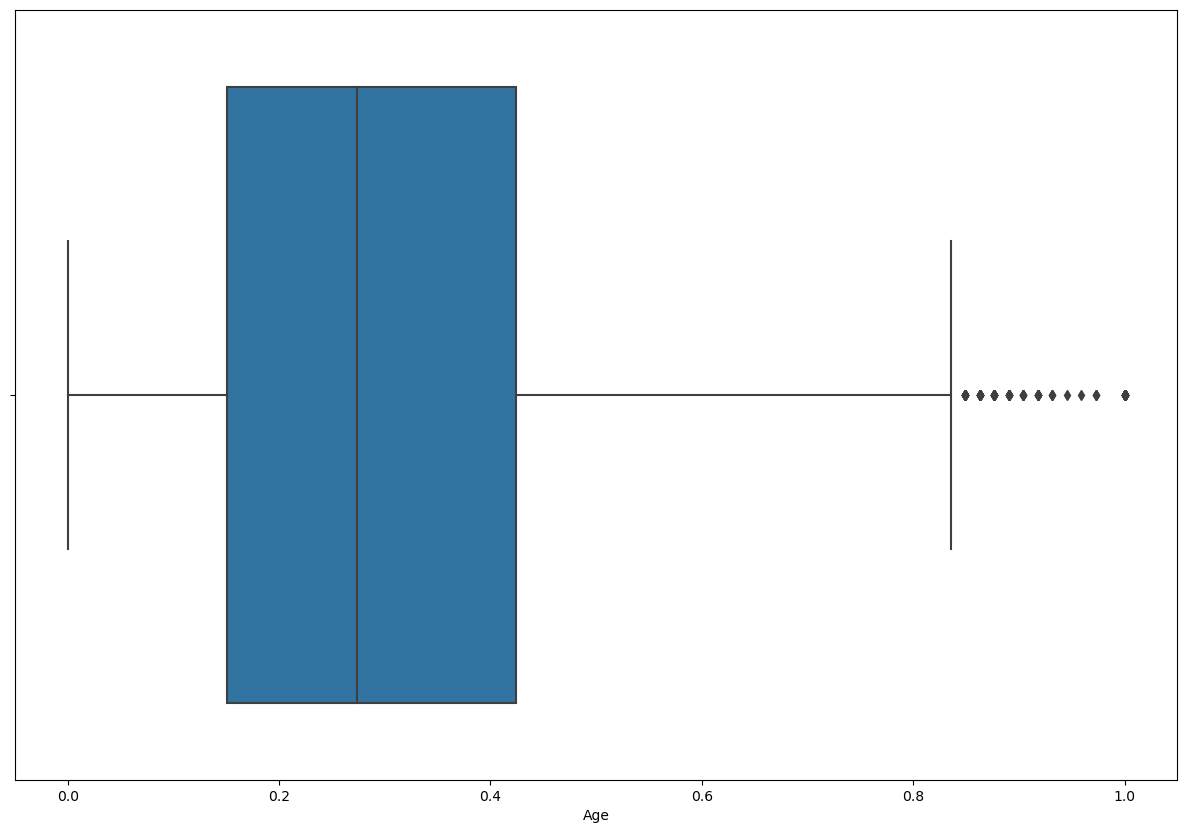

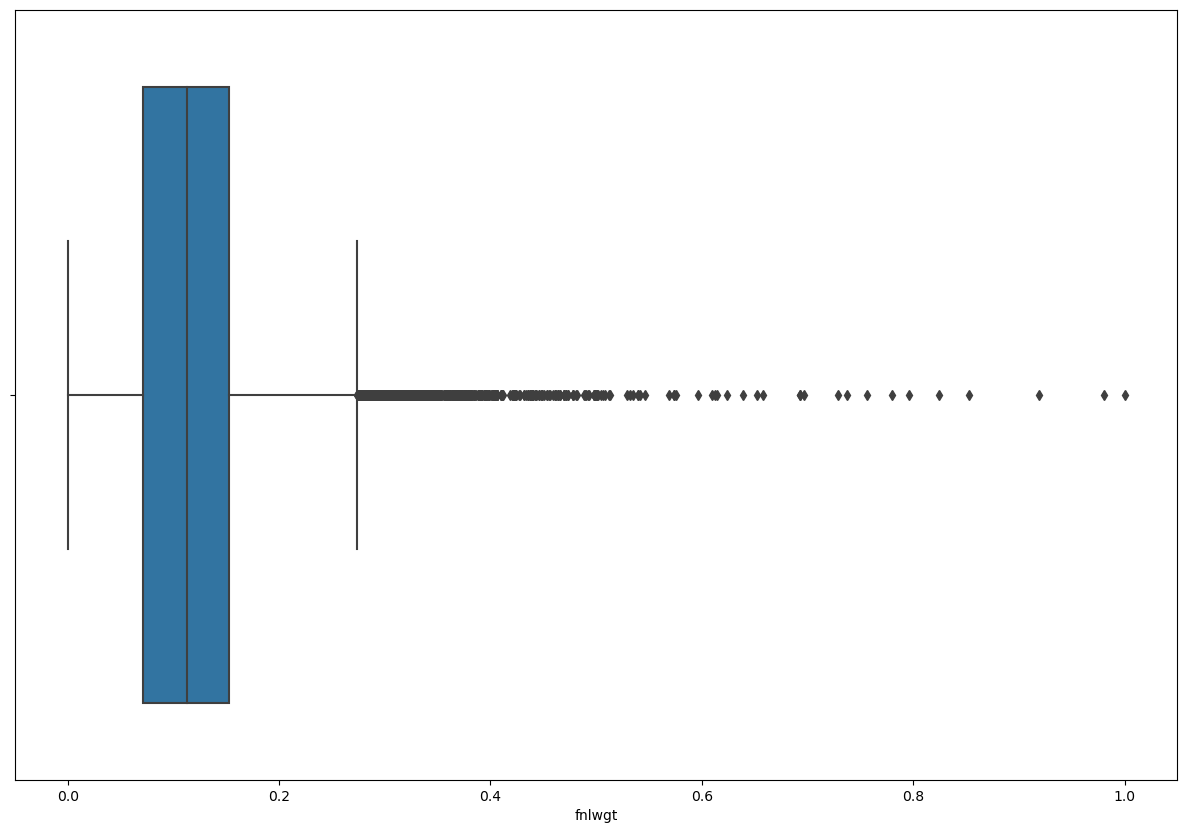

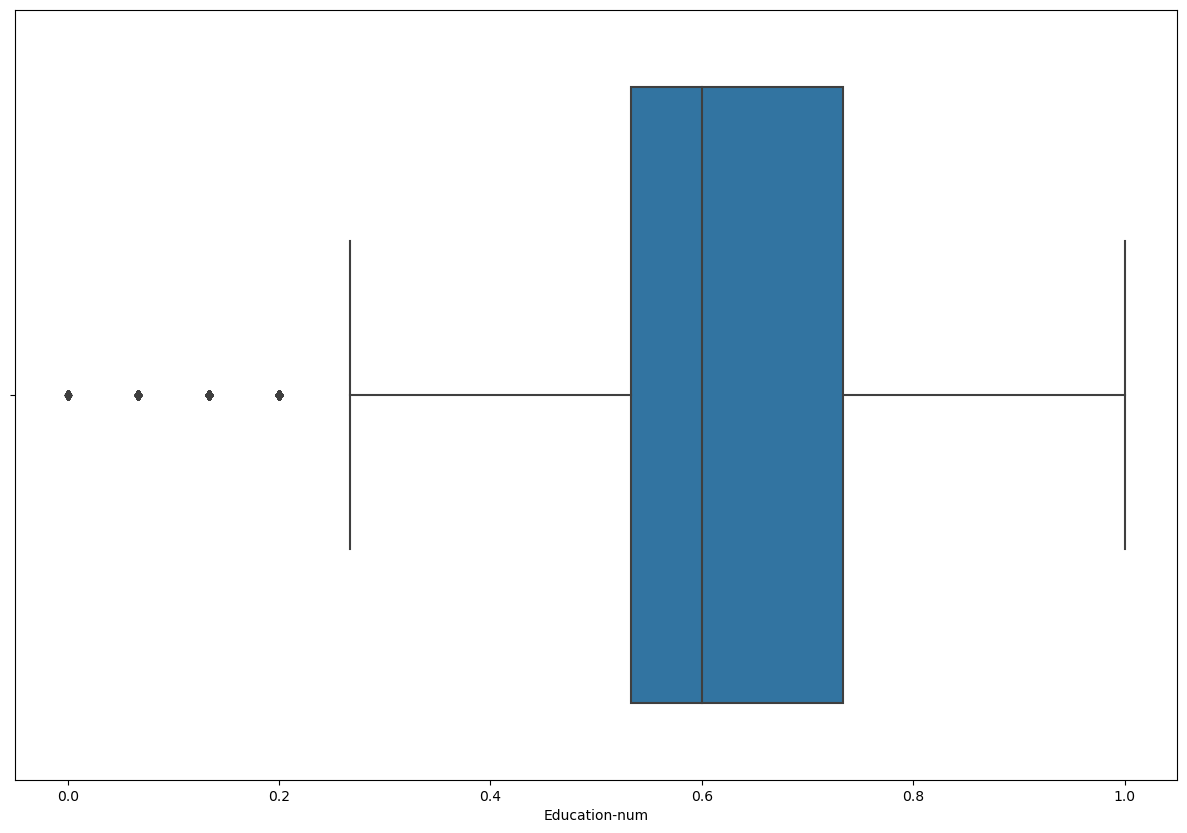

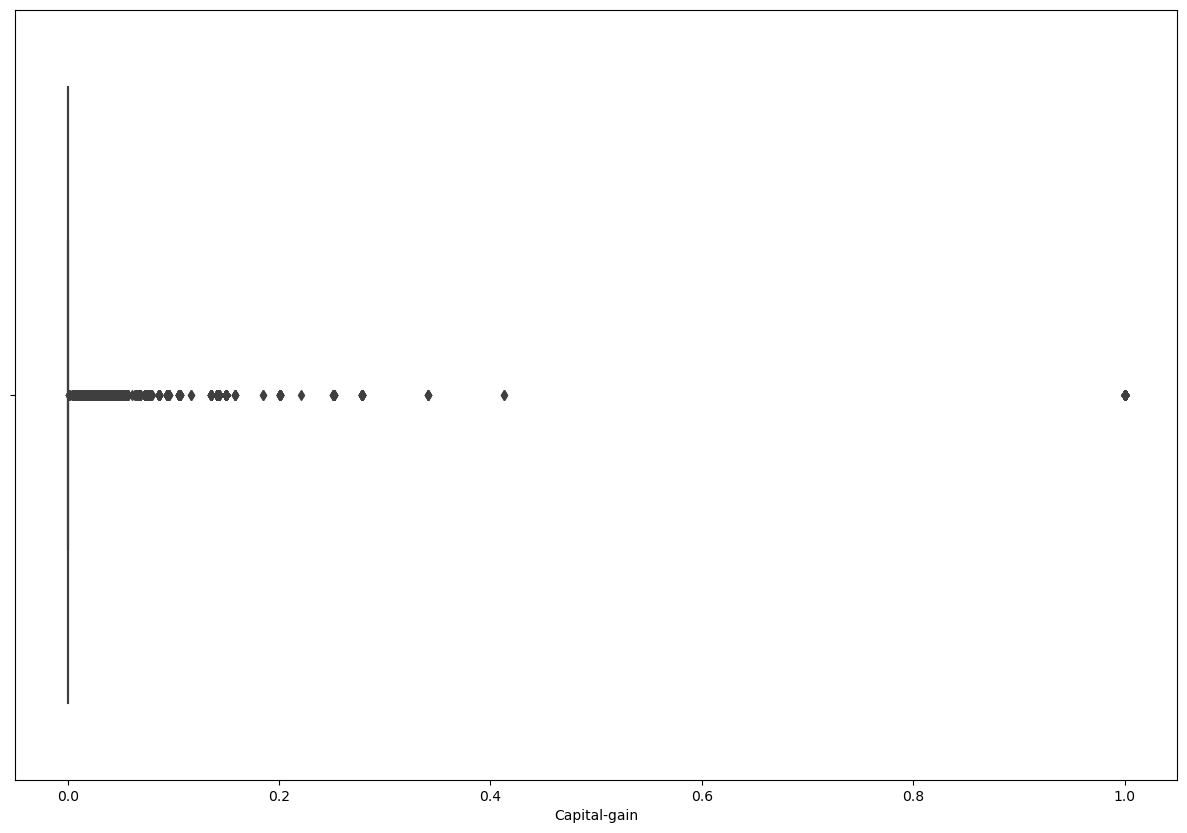

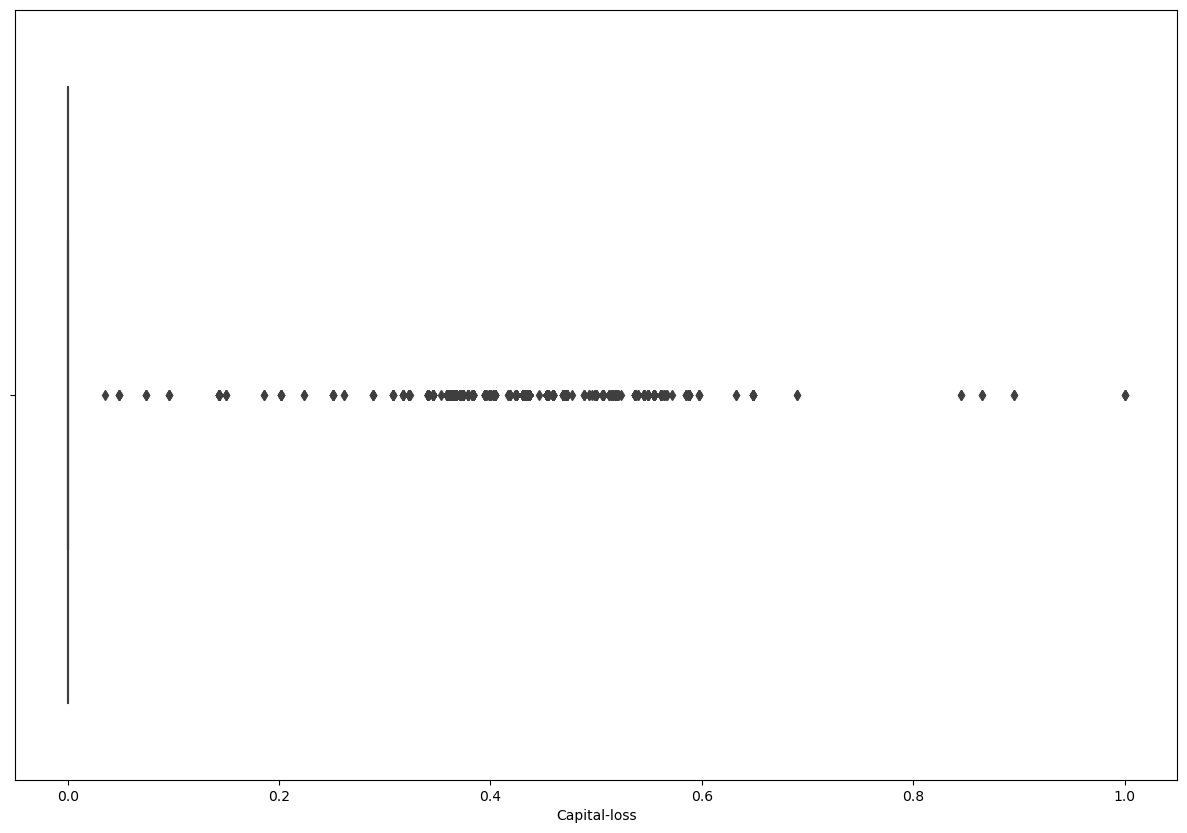

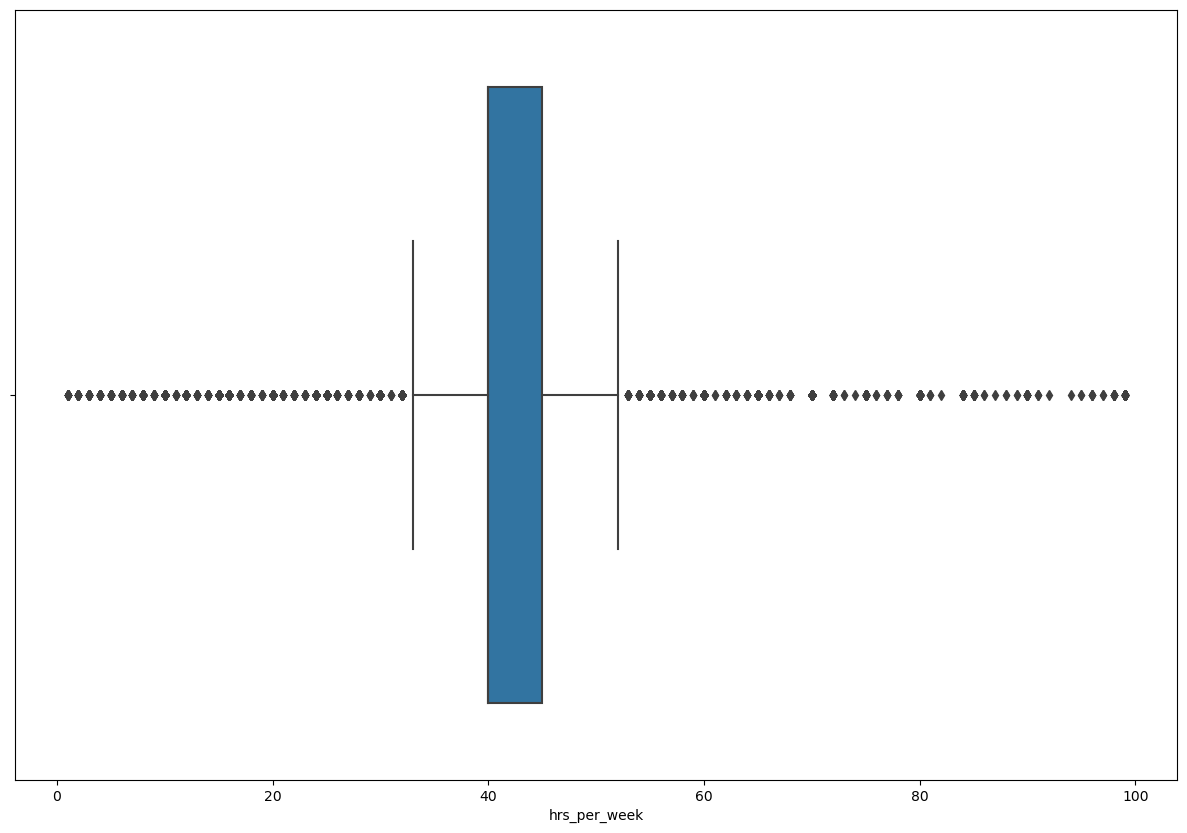

In [16]:
for i in range(len(numerical_columns)):
    plt.figure(figsize=(15,10))
    sns.boxplot(scaled_encoded_adult_data_train[numerical_columns[i]])
plt.show() 

In [17]:
def outlier_detector(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn,[25,75])
    IQR = Q3 - Q1
    lower_bound = Q1-(1.5*IQR)
    upper_bound = Q3+(1.5*IQR)
    return lower_bound,upper_bound

In [18]:
lowerbound, upperbound = outlier_detector(scaled_encoded_adult_data_train['Age'])
lowerbound, upperbound

(-0.2602739726027397, 0.8356164383561644)

In [19]:
scaled_encoded_adult_data_train[(scaled_encoded_adult_data_train.Age < lowerbound) | (scaled_encoded_adult_data_train.Age > upperbound)]

,Age,Workclass,fnlwgt,Education,Education-num,Marital_Status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,hrs_per_week,Native-Country
74,0.849315,0.500,0.076377,1.000000,0.600000,0.333333,0.714286,0.4,1.00,1.0,0.000000,0.000000,20,0.951220
222,1.000000,0.500,0.026799,0.733333,0.533333,0.666667,0.571429,0.2,0.50,1.0,0.000000,0.506428,40,0.951220
430,0.863014,0.000,0.064844,0.733333,0.533333,1.000000,0.000000,0.2,1.00,1.0,0.000000,0.000000,24,0.951220
918,0.876712,0.750,0.084064,0.733333,0.533333,0.333333,0.285714,0.0,1.00,1.0,0.000000,0.000000,30,0.951220
1040,1.000000,0.500,0.084713,0.733333,0.533333,0.666667,0.571429,0.2,1.00,0.0,0.000000,0.000000,40,0.951220
1168,0.972603,0.750,0.131760,0.933333,0.933333,0.333333,0.714286,0.0,1.00,1.0,0.000000,0.000000,40,0.951220
1935,1.000000,0.500,0.142315,0.600000,0.800000,0.333333,0.285714,0.0,1.00,1.0,0.000000,0.000000,45,0.951220
2303,1.000000,0.500,0.027235,1.000000,0.600000,0.666667,0.571429,0.2,0.25,1.0,0.000000,0.000000,35,0.951220
2754,0.863014,0.750,0.116848,0.333333,0.200000,0.333333,0.357143,0.0,1.00,1.0,0.000000,0.000000,30,0.951220
2891,1.000000,0.500,0.108441,1.000000,0.600000,0.833333,0.071429,0.6,1.00,0.0,0.000000,0.000000,40,0.804878


In [20]:
new_columns = numerical_columns.copy()
new_columns.remove('Capital-gain') #Sparse column, must not be treated
new_columns.remove('Capital-loss') #Sparse column, must not be treated
new_columns

['Age', 'fnlwgt', 'Education-num', 'hrs_per_week']

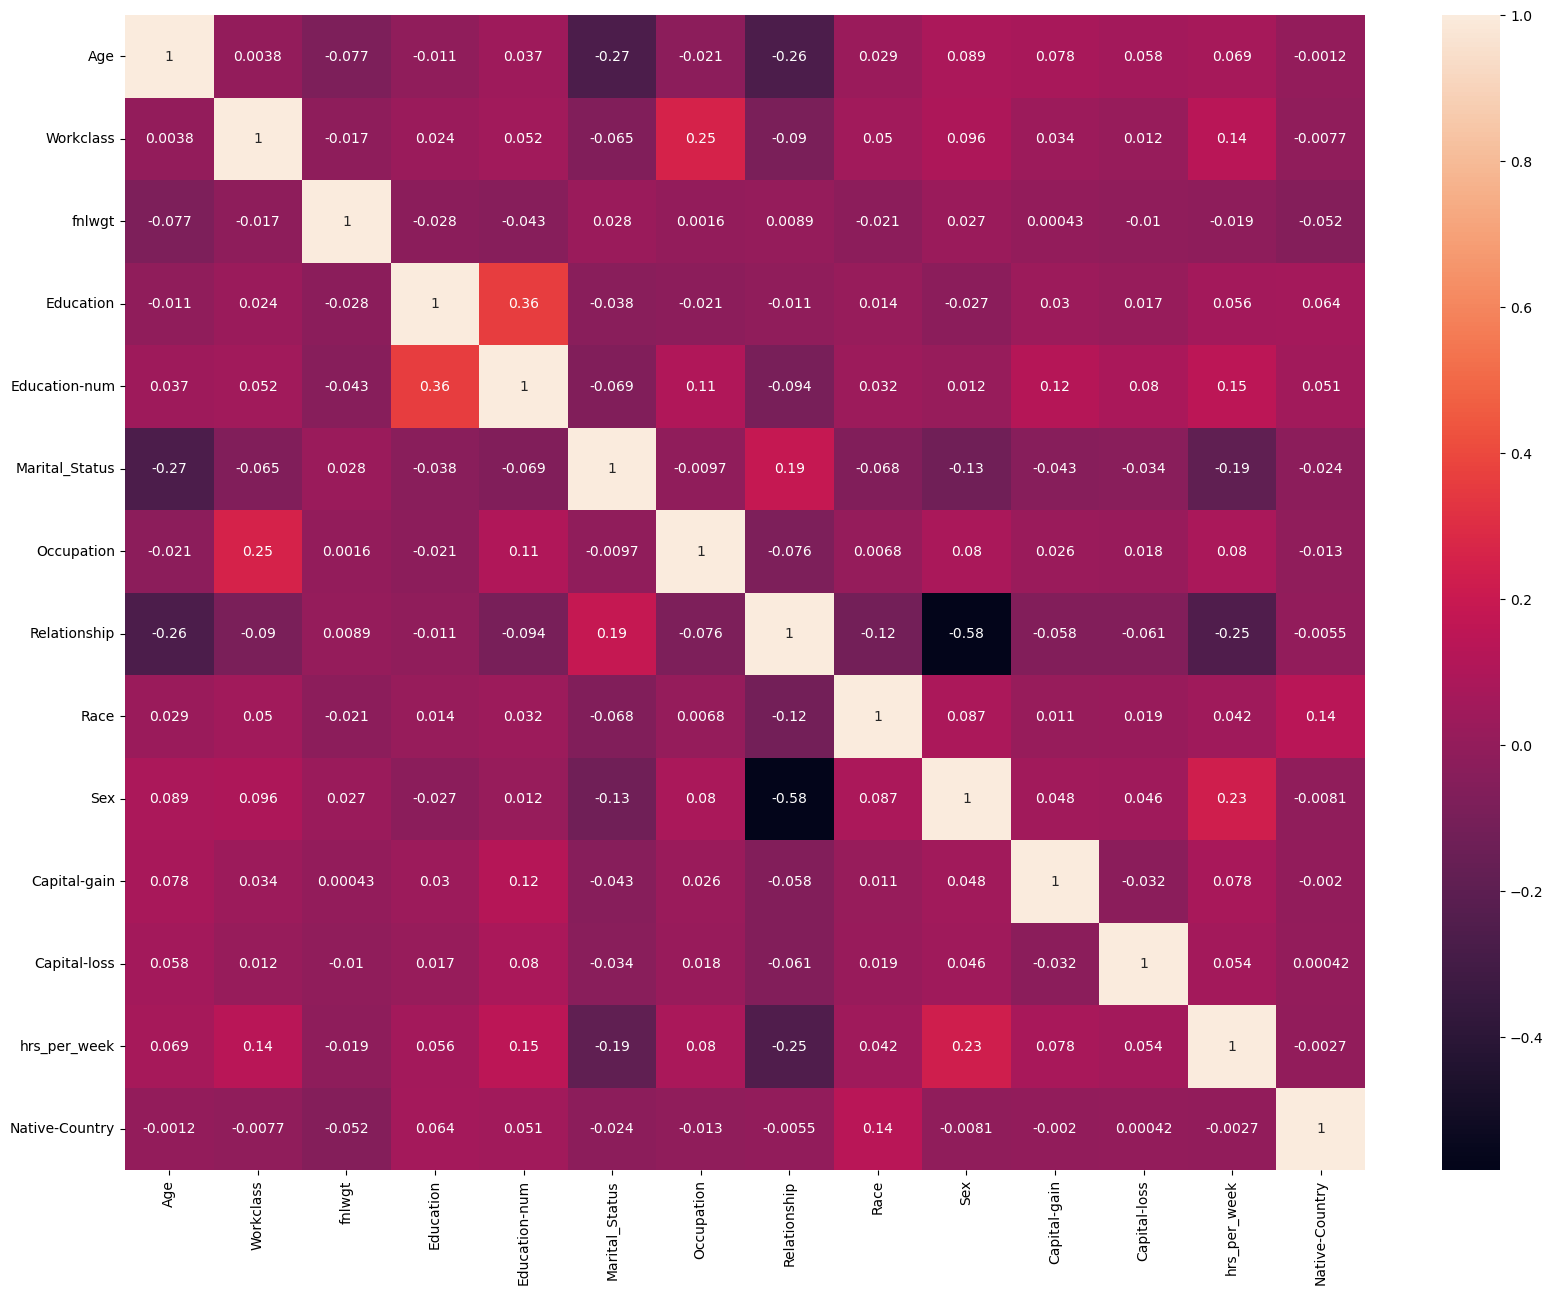

In [21]:
treated_scaled_encoded_adult_data_train = scaled_encoded_adult_data_train.copy()
fig,ax=plt.subplots(figsize=(20,15))
ax=sns.heatmap(treated_scaled_encoded_adult_data_train.corr(),annot=True)

In [22]:
#測試資料集的預處理
null_columns_test = adult_data_test.columns[adult_data_test.isnull().any()]
adult_data_test[null_columns].isnull().sum()

Series([], dtype: float64)

In [23]:
for i in list(null_columns_test):
    adult_data_test[i].fillna(adult_data_test[i].mode().values[0],inplace=True)

In [24]:
print('{null_sum} \n\n {adult_data_test_info}'.format(null_sum=adult_data_test.isna().sum(), adult_data_test_info=adult_data_test.info()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                32561 non-null  int64 
 1   Workclass          32561 non-null  object
 2   fnlwgt             32561 non-null  int64 
 3   Education          32561 non-null  object
 4   Education-num      32561 non-null  int64 
 5   Marital_Status     32561 non-null  object
 6   Occupation         32561 non-null  object
 7   Relationship       32561 non-null  object
 8   Race               32561 non-null  object
 9   Sex                32561 non-null  object
 10  Capital-gain       32561 non-null  int64 
 11  Capital-loss       32561 non-null  int64 
 12  hrs_per_week       32561 non-null  int64 
 13  Native-Country     32561 non-null  object
 14  Earning_potential  32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
Age                  0
Workclass          

In [25]:
adult_data_test[categorical_columns].head()

,Workclass,Education,Marital_Status,Occupation,Relationship,Race,Sex,Native-Country,Earning_potential
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [26]:
encoded_adult_data_test = adult_data_test
for i in categorical_columns:
    encoded_adult_data_test[i] = label_encoder.fit_transform(adult_data_test[i])
encoded_adult_data_test[categorical_columns].head()

,Workclass,Education,Marital_Status,Occupation,Relationship,Race,Sex,Native-Country,Earning_potential
0,7,9,4,1,1,4,1,39,0
1,6,9,2,4,0,4,1,39,0
2,4,11,0,6,1,4,1,39,0
3,4,1,2,6,0,2,1,39,0
4,4,9,2,10,5,2,0,5,0


In [27]:
scaled_encoded_adult_data_test = pd.DataFrame()

column_values = encoded_adult_data_test.columns.values
column_values = column_values[:-1]
print(column_values[-1])

scaled_values = min_max_scaler.fit_transform(encoded_adult_data_test[column_values])

for i in range(len(column_values)):
    scaled_encoded_adult_data_test[column_values[i]] = scaled_values[:,i]
    
scaled_encoded_adult_data_test['hrs_per_week'] = encoded_adult_data_test['hrs_per_week']
scaled_encoded_adult_data_test.sample(10)

Native-Country


,Age,Workclass,fnlwgt,Education,Education-num,Marital_Status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,hrs_per_week,Native-Country
21366,0.150685,0.50,0.120961,0.600000,0.800000,0.666667,0.857143,0.2,1.00,1.0,0.0,0.0,40,0.951220
4829,0.342466,0.50,0.127614,0.533333,0.666667,0.000000,0.571429,0.8,1.00,0.0,0.0,0.0,32,0.951220
30441,0.547945,0.50,0.083883,0.000000,0.333333,0.333333,0.500000,0.0,0.50,1.0,0.0,0.0,48,0.951220
15580,0.342466,0.00,0.105536,0.066667,0.400000,0.333333,0.000000,0.0,1.00,1.0,0.0,0.0,22,0.170732
24467,0.136986,0.50,0.117386,0.533333,0.666667,0.666667,0.285714,0.6,1.00,1.0,0.0,0.0,40,0.951220
8497,0.246575,0.50,0.036682,0.600000,0.800000,0.666667,0.714286,0.2,0.25,0.0,0.0,0.0,40,0.731707
22993,0.178082,0.50,0.159709,1.000000,0.600000,0.333333,0.500000,0.0,1.00,1.0,0.0,0.0,40,0.658537
30251,0.082192,0.50,0.161470,1.000000,0.600000,0.666667,0.357143,0.2,1.00,0.0,0.0,0.0,50,0.951220
27235,0.369863,0.50,0.122207,0.600000,0.800000,0.333333,0.285714,0.0,1.00,1.0,0.0,0.0,40,0.951220
31524,0.465753,0.75,0.059018,0.466667,0.733333,0.333333,0.285714,0.0,1.00,1.0,0.0,0.0,40,0.951220


In [28]:
scaled_encoded_adult_data_test.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,32561.0,0.295639,0.186855,0.0,0.150685,0.273973,0.424658,1.0
Workclass,32561.0,0.483612,0.181995,0.0,0.500000,0.500000,0.500000,1.0
fnlwgt,32561.0,0.120545,0.071685,0.0,0.071679,0.112788,0.152651,1.0
Education,32561.0,0.686547,0.258018,0.0,0.600000,0.733333,0.800000,1.0
Education-num,32561.0,0.605379,0.171515,0.0,0.533333,0.600000,0.733333,1.0
Marital_Status,32561.0,0.435306,0.251037,0.0,0.333333,0.333333,0.666667,1.0
Occupation,32561.0,0.469481,0.302061,0.0,0.214286,0.500000,0.714286,1.0
Relationship,32561.0,0.289272,0.321354,0.0,0.000000,0.200000,0.600000,1.0
Race,32561.0,0.916464,0.212201,0.0,1.000000,1.000000,1.000000,1.0
Sex,32561.0,0.669205,0.470506,0.0,0.000000,1.000000,1.000000,1.0


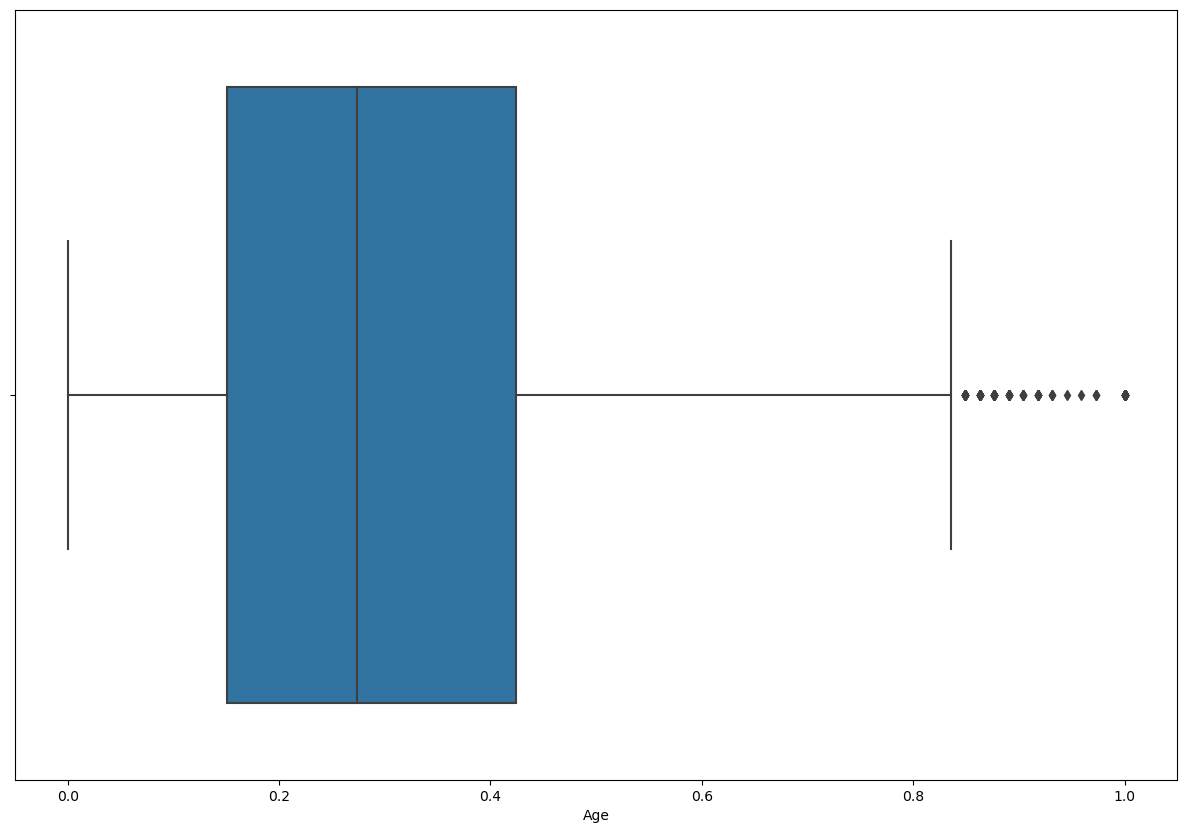

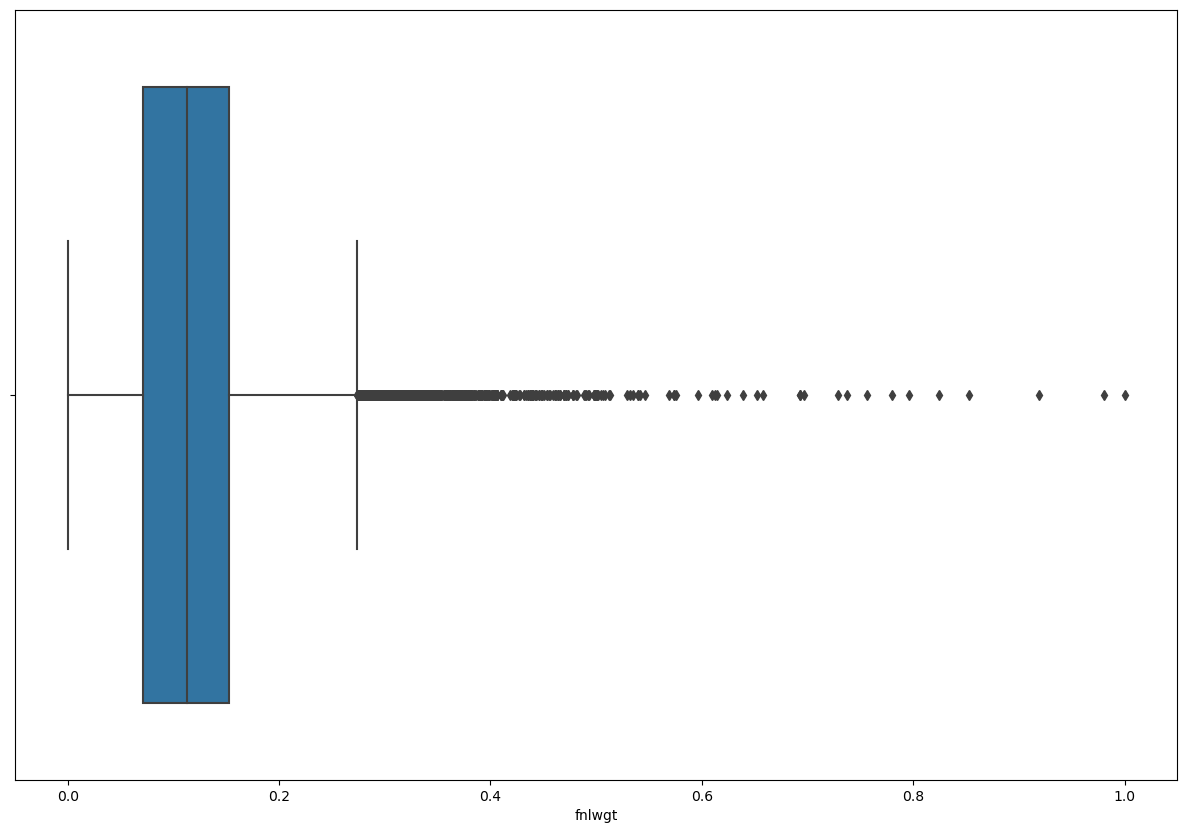

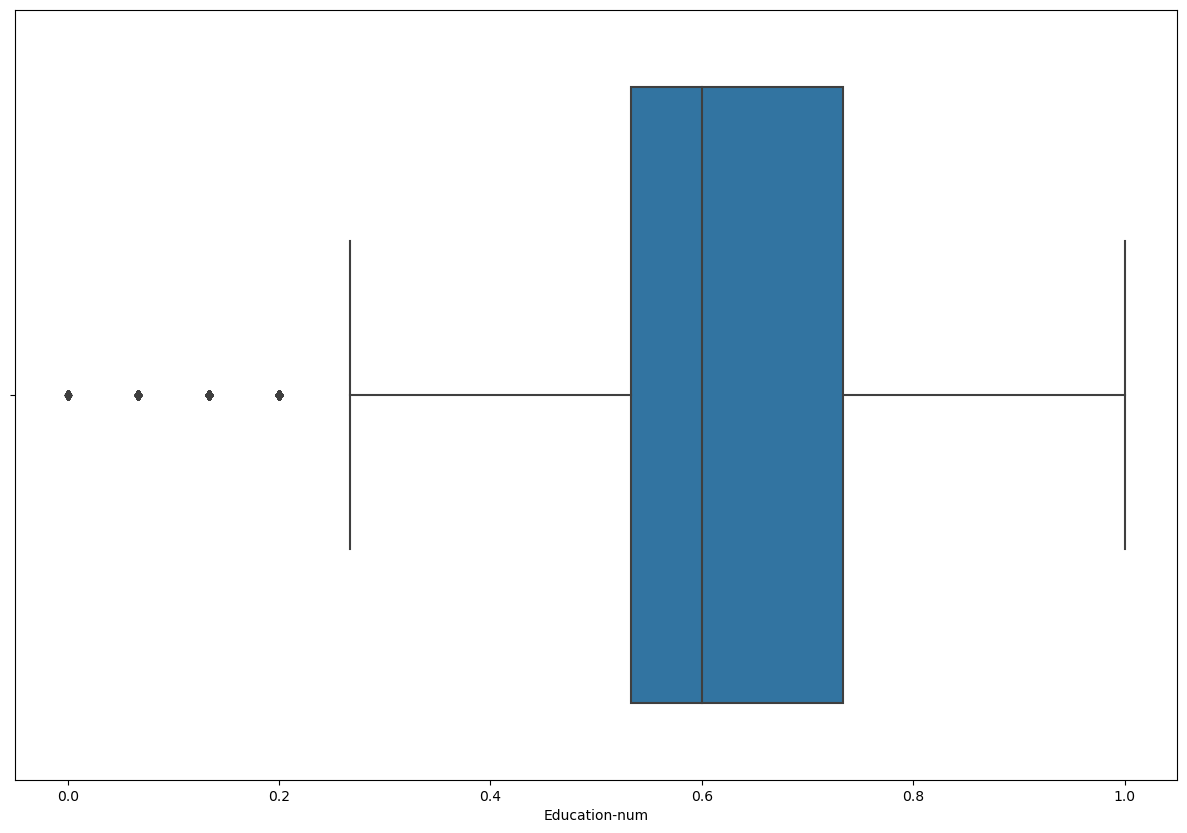

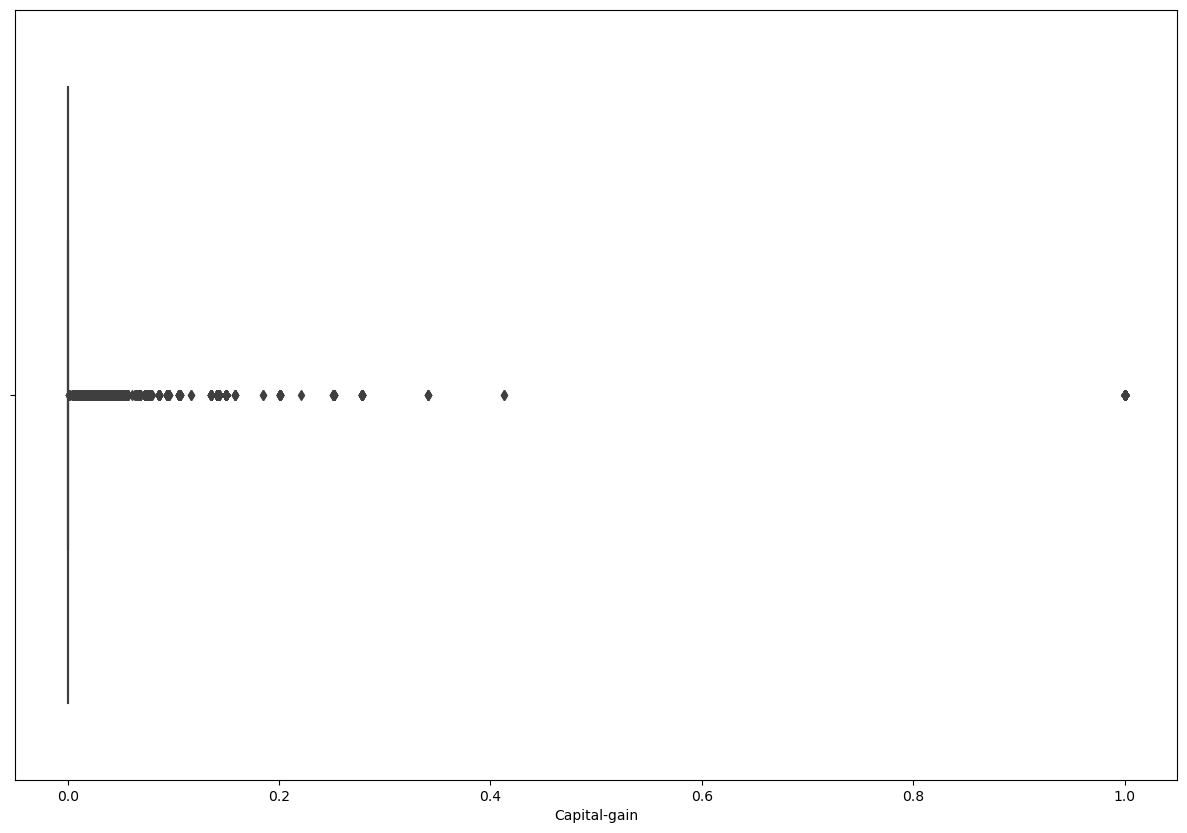

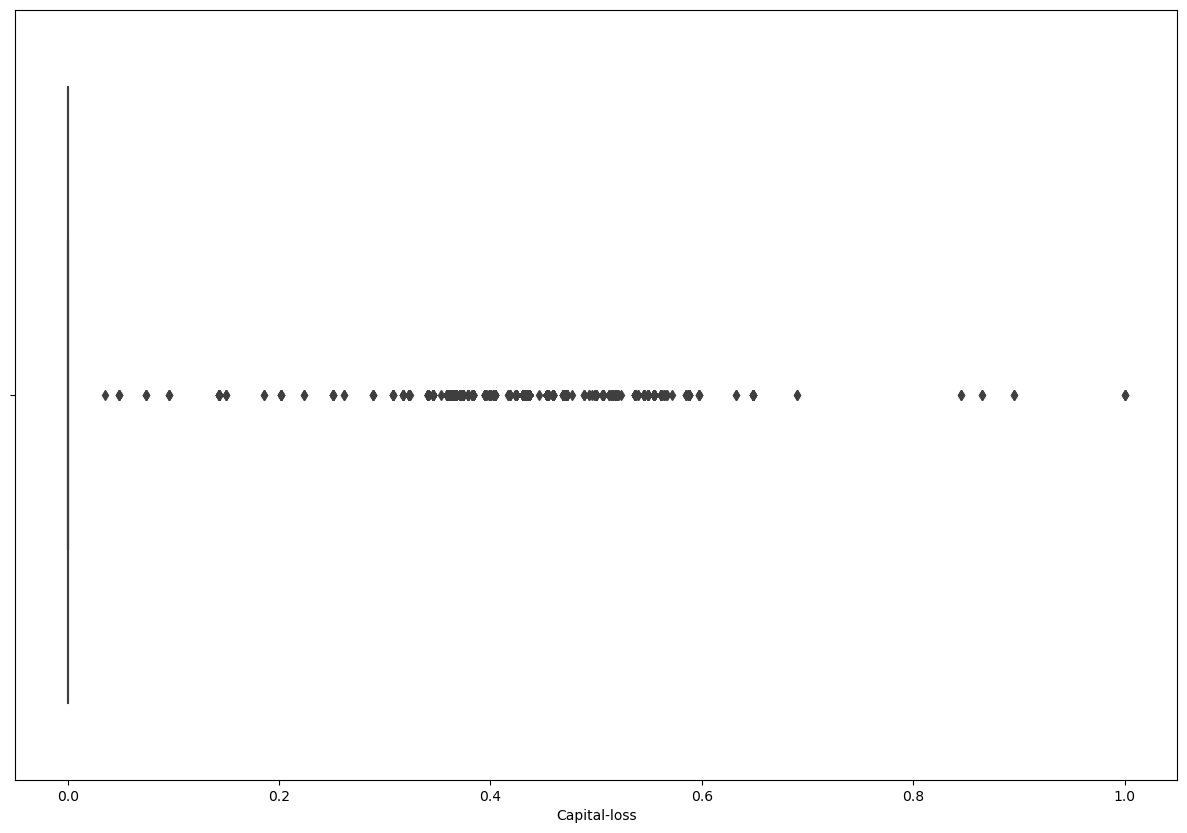

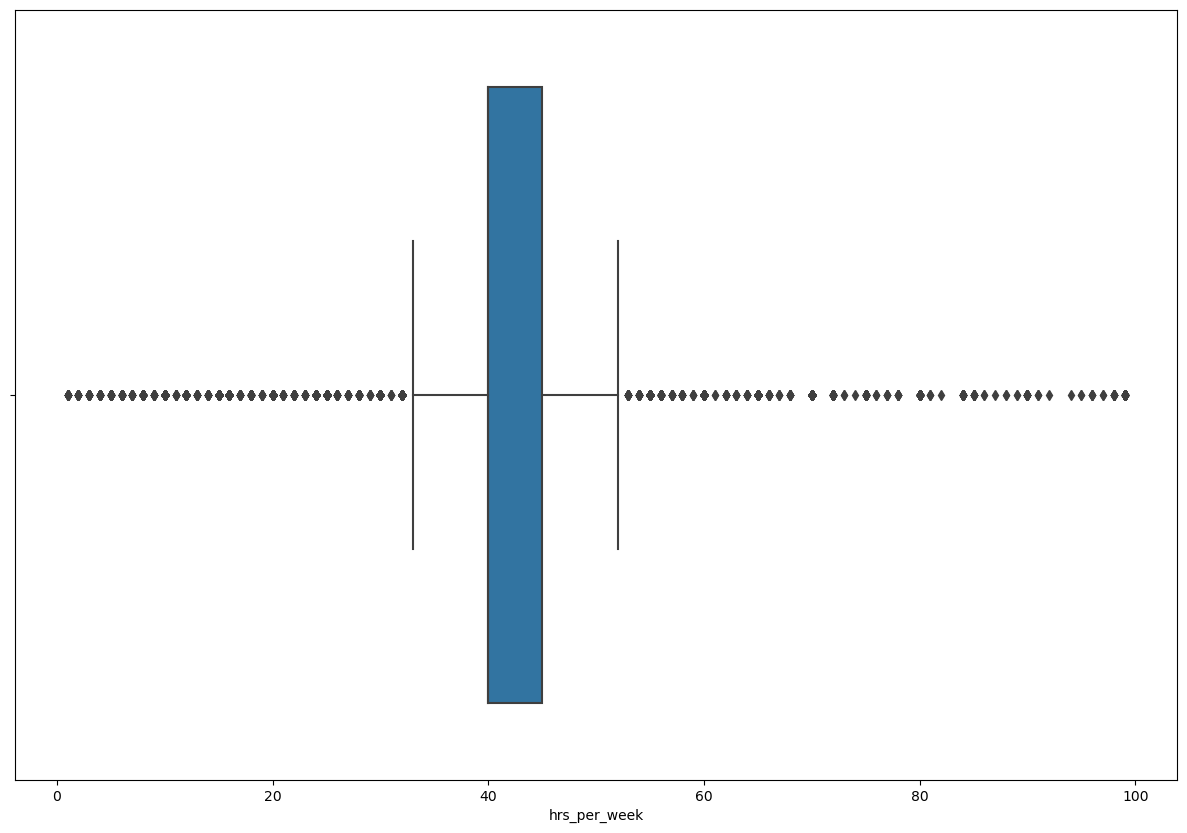

In [29]:
for i in range(len(numerical_columns)):
    plt.figure(figsize=(15,10))
    sns.boxplot(scaled_encoded_adult_data_test[numerical_columns[i]])
plt.show() 

In [30]:
lowerbound, upperbound = outlier_detector(scaled_encoded_adult_data_test['Age'])
lowerbound, upperbound

(-0.2602739726027397, 0.8356164383561644)

In [31]:
scaled_encoded_adult_data_test[(scaled_encoded_adult_data_test.Age < lowerbound) | (scaled_encoded_adult_data_test.Age > upperbound)]

,Age,Workclass,fnlwgt,Education,Education-num,Marital_Status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,hrs_per_week,Native-Country
74,0.849315,0.500,0.076377,1.000000,0.600000,0.333333,0.714286,0.4,1.00,1.0,0.000000,0.000000,20,0.951220
222,1.000000,0.500,0.026799,0.733333,0.533333,0.666667,0.571429,0.2,0.50,1.0,0.000000,0.506428,40,0.951220
430,0.863014,0.000,0.064844,0.733333,0.533333,1.000000,0.000000,0.2,1.00,1.0,0.000000,0.000000,24,0.951220
918,0.876712,0.750,0.084064,0.733333,0.533333,0.333333,0.285714,0.0,1.00,1.0,0.000000,0.000000,30,0.951220
1040,1.000000,0.500,0.084713,0.733333,0.533333,0.666667,0.571429,0.2,1.00,0.0,0.000000,0.000000,40,0.951220
1168,0.972603,0.750,0.131760,0.933333,0.933333,0.333333,0.714286,0.0,1.00,1.0,0.000000,0.000000,40,0.951220
1935,1.000000,0.500,0.142315,0.600000,0.800000,0.333333,0.285714,0.0,1.00,1.0,0.000000,0.000000,45,0.951220
2303,1.000000,0.500,0.027235,1.000000,0.600000,0.666667,0.571429,0.2,0.25,1.0,0.000000,0.000000,35,0.951220
2754,0.863014,0.750,0.116848,0.333333,0.200000,0.333333,0.357143,0.0,1.00,1.0,0.000000,0.000000,30,0.951220
2891,1.000000,0.500,0.108441,1.000000,0.600000,0.833333,0.071429,0.6,1.00,0.0,0.000000,0.000000,40,0.804878


In [32]:
new_columns = numerical_columns.copy()
new_columns.remove('Capital-gain') #Sparse column, must not be treated
new_columns.remove('Capital-loss') #Sparse column, must not be treated
new_columns

['Age', 'fnlwgt', 'Education-num', 'hrs_per_week']

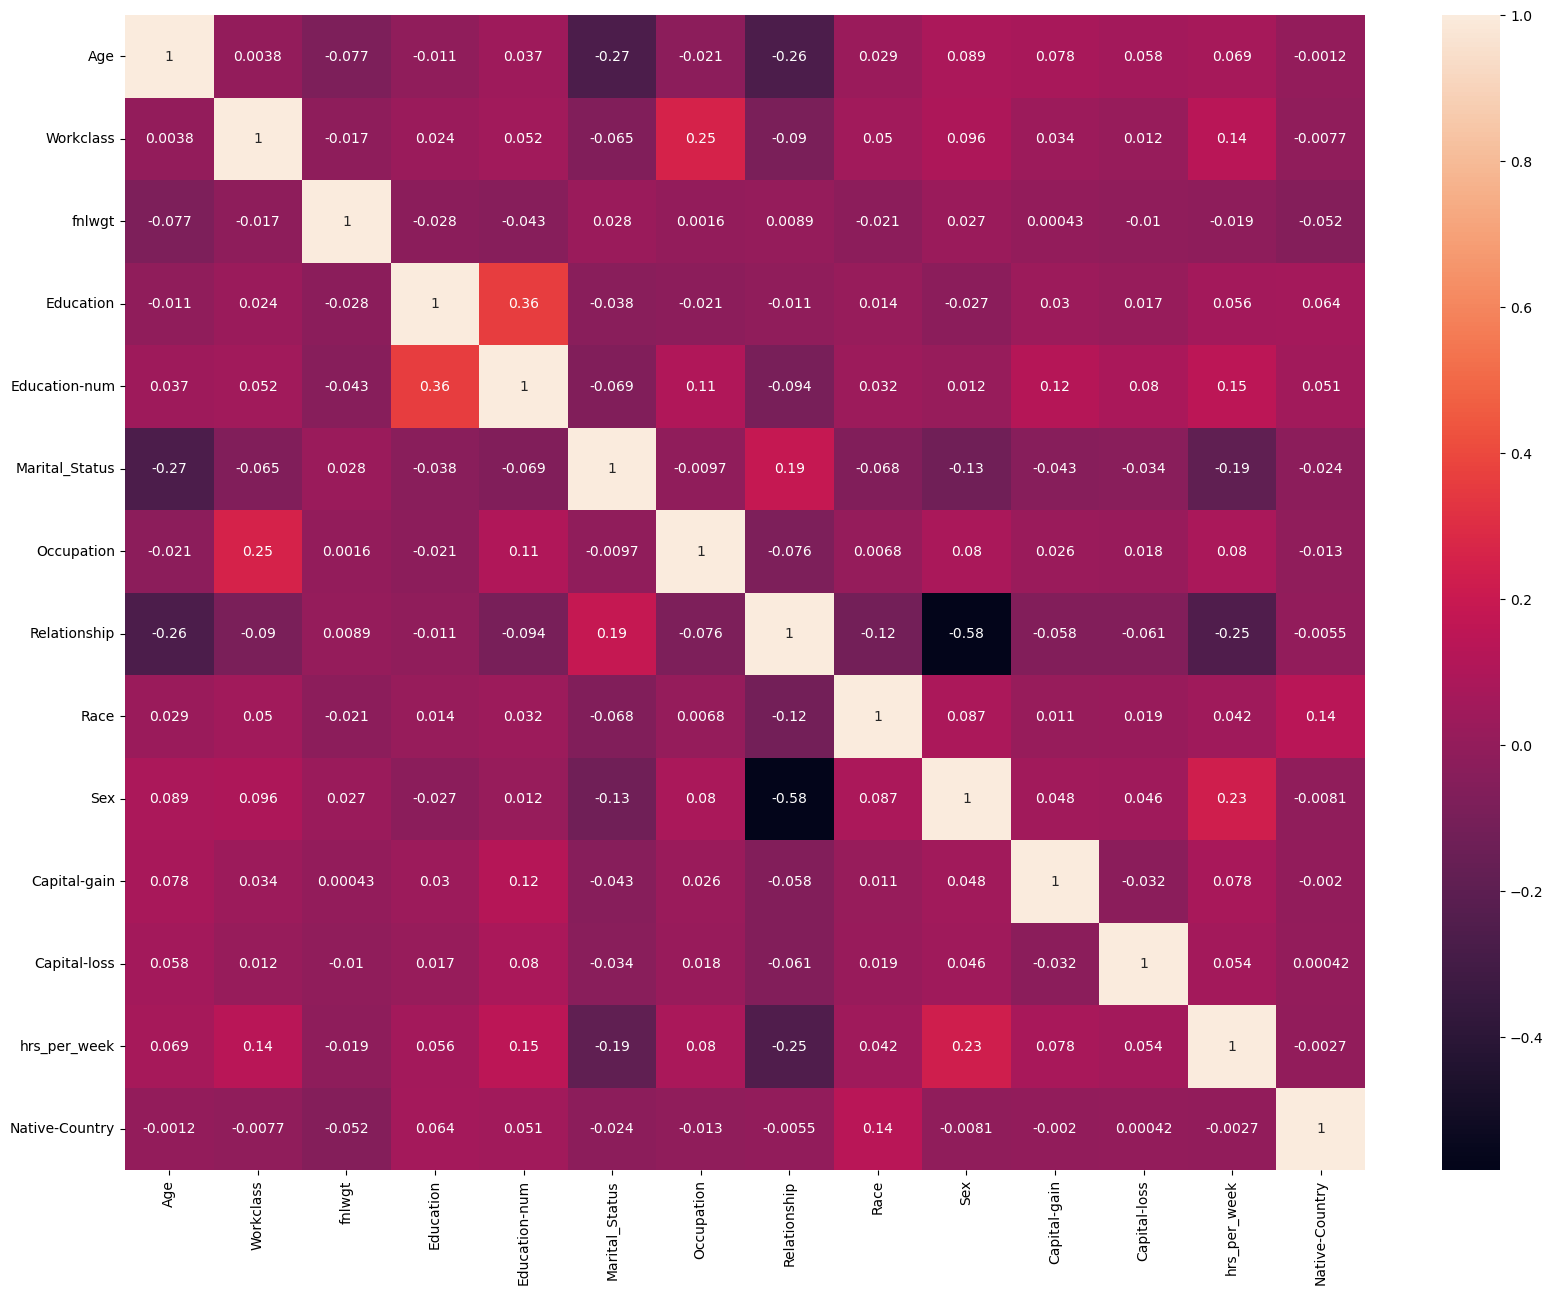

In [33]:
treated_scaled_encoded_adult_data_test = scaled_encoded_adult_data_test.copy()
fig,ax=plt.subplots(figsize=(20,15))
ax=sns.heatmap(treated_scaled_encoded_adult_data_test.corr(),annot=True)

In [35]:
print(all_columns)

features = all_columns[:-1]
target = treated_scaled_encoded_adult_data_train['hrs_per_week']
print(features)
print(treated_scaled_encoded_adult_data_train.shape)

['Age', 'Workclass', 'fnlwgt', 'Education', 'Education-num', 'Marital_Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Capital-gain', 'Capital-loss', 'hrs_per_week', 'Native-Country', 'Earning_potential']
['Age', 'Workclass', 'fnlwgt', 'Education', 'Education-num', 'Marital_Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Capital-gain', 'Capital-loss', 'hrs_per_week', 'Native-Country']
(32561, 14)


In [36]:
feature_df = treated_scaled_encoded_adult_data_train[features]
print(target.head())
feature_df.head()

0    40
1    13
2    40
3    40
4    40
Name: hrs_per_week, dtype: int64


,Age,Workclass,fnlwgt,Education,Education-num,Marital_Status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,hrs_per_week,Native-Country
0,0.301370,0.875,0.044302,0.600000,0.800000,0.666667,0.071429,0.2,1.0,1.0,0.02174,0.0,40,0.951220
1,0.452055,0.750,0.048238,0.600000,0.800000,0.333333,0.285714,0.0,1.0,1.0,0.00000,0.0,13,0.951220
2,0.287671,0.500,0.138113,0.733333,0.533333,0.000000,0.428571,0.2,1.0,1.0,0.00000,0.0,40,0.951220
3,0.493151,0.500,0.151068,0.066667,0.400000,0.333333,0.428571,0.0,0.5,1.0,0.00000,0.0,40,0.951220
4,0.150685,0.500,0.221488,0.600000,0.800000,0.333333,0.714286,1.0,0.5,0.0,0.00000,0.0,40,0.121951


In [37]:
print(all_columns)

features_test = all_columns[:-1]
target_test = treated_scaled_encoded_adult_data_test['hrs_per_week']
print(features_test)
print(treated_scaled_encoded_adult_data_test.shape)

['Age', 'Workclass', 'fnlwgt', 'Education', 'Education-num', 'Marital_Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Capital-gain', 'Capital-loss', 'hrs_per_week', 'Native-Country', 'Earning_potential']
['Age', 'Workclass', 'fnlwgt', 'Education', 'Education-num', 'Marital_Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Capital-gain', 'Capital-loss', 'hrs_per_week', 'Native-Country']
(32561, 14)


In [38]:
feature_df_test = treated_scaled_encoded_adult_data_test[features_test]
print(target_test.head())
feature_df_test.head()

0    40
1    13
2    40
3    40
4    40
Name: hrs_per_week, dtype: int64


,Age,Workclass,fnlwgt,Education,Education-num,Marital_Status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,hrs_per_week,Native-Country
0,0.301370,0.875,0.044302,0.600000,0.800000,0.666667,0.071429,0.2,1.0,1.0,0.02174,0.0,40,0.951220
1,0.452055,0.750,0.048238,0.600000,0.800000,0.333333,0.285714,0.0,1.0,1.0,0.00000,0.0,13,0.951220
2,0.287671,0.500,0.138113,0.733333,0.533333,0.000000,0.428571,0.2,1.0,1.0,0.00000,0.0,40,0.951220
3,0.493151,0.500,0.151068,0.066667,0.400000,0.333333,0.428571,0.0,0.5,1.0,0.00000,0.0,40,0.951220
4,0.150685,0.500,0.221488,0.600000,0.800000,0.333333,0.714286,1.0,0.5,0.0,0.00000,0.0,40,0.121951


In [39]:
x_train, x_test, y_train, y_test = train_test_split(feature_df, target, test_size=0.2)

In [40]:
print(x_train.shape,y_train.shape, x_test.shape, y_test.shape)

(26048, 14) (26048,) (6513, 14) (6513,)


In [41]:
#KNN
error_rate = []
# Will take some time
k_values = list(filter(lambda x: x%2==1, range(0,50)))
best_k = 0
for i in k_values:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))
print(error_rate.index(np.min(error_rate)))

0


Text(0, 0.5, 'Error Rate')

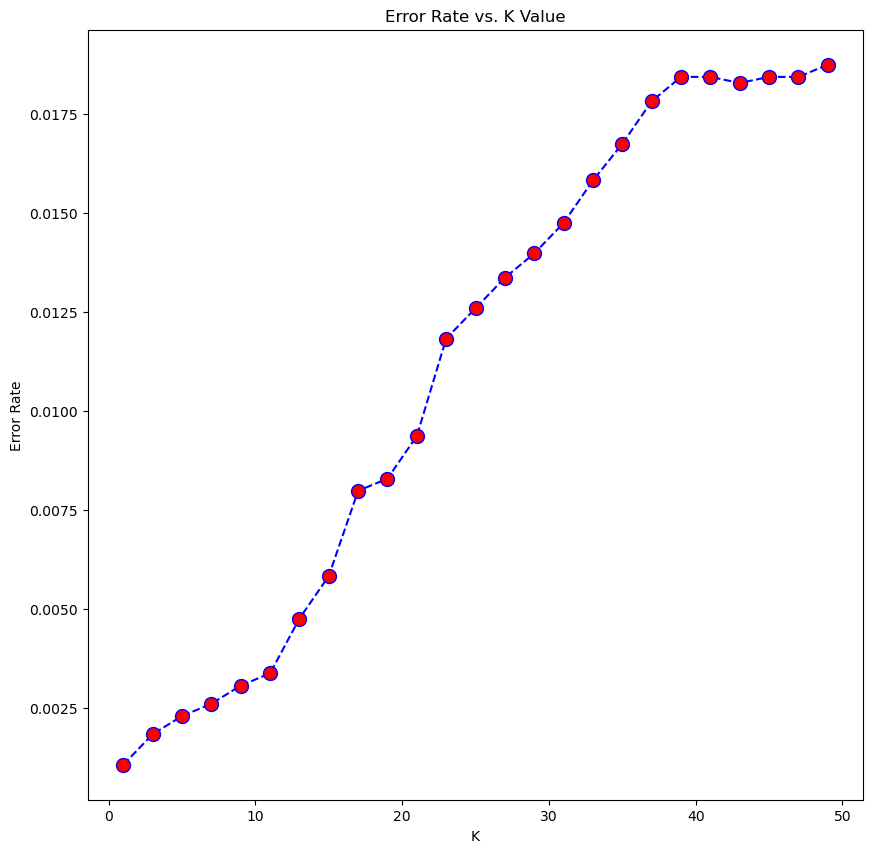

In [42]:
plt.figure(figsize=(10,10))
plt.plot(k_values,error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [43]:
knn_classifier = KNeighborsClassifier(n_neighbors=2)
knn_classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [44]:
knn_train_score = knn_classifier.score(x_train, y_train)
knn_test_score = knn_classifier.score(x_test, y_test)

print('Train score: {}\nTest score: {}'.format(knn_train_score, knn_test_score))

Train score: 0.9990402334152334
Test score: 0.9987716873944419


In [45]:
knn_prediction = knn_classifier.predict(x_test)

knn_classifier_mae = mean_absolute_error(y_test, knn_prediction)
knn_classifier_rmse = np.sqrt(knn_classifier_mae)
knn_classifier_mape = mean_absolute_percentage_error(y_test, knn_prediction)

print('MAE: {}\nRMSE: {}\nMAPE: {}'.format(knn_classifier_mae, knn_classifier_rmse, knn_classifier_mape))

MAE: 0.0012283126055581146
RMSE: 0.03504729098743745
MAPE: 3.6290290671488e-05


In [46]:
#RandomForest
random_forest_classifier = RandomForestClassifier(n_estimators=20, min_samples_split=15, min_impurity_decrease=0.05)
random_forest_classifier.fit(x_train, y_train)

RandomForestClassifier(min_impurity_decrease=0.05, min_samples_split=15,
                       n_estimators=20)

In [47]:
random_forest_train_score = random_forest_classifier.score(x_train,y_train)
random_forest_test_score = random_forest_classifier.score(x_test,y_test)
print('Train score: {}\nTest score: {}'.format(random_forest_train_score, random_forest_test_score))

Train score: 0.4665617321867322
Test score: 0.4704437279287579


In [48]:
random_forest_prediction = random_forest_classifier.predict(x_test)

random_forest_mae = mean_absolute_error(y_test, random_forest_prediction)
random_forest_rmse = np.sqrt(random_forest_mae)
random_forest_mape = mean_absolute_percentage_error(y_test, random_forest_prediction)

print('MAE: {}\nRMSE: {}\nMAPE: {}'.format(random_forest_mae, random_forest_rmse, random_forest_mape))

MAE: 7.447105788423154
RMSE: 2.7289385827502888
MAPE: 0.32762005770210106


In [49]:
#XGboost
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.fit_transform(y_test)
xgboostModel = XGBClassifier(n_estimators=20, learning_rate= 0.3)
xgboostModel.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.3, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=20, n_jobs=0,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto', ...)

In [50]:
xgboost_train_score = xgboostModel.score(x_train,y_train)
xgboost_test_score = xgboostModel.score(x_test,y_test)
print('Train score: {}\nTest score: {}'.format(xgboost_train_score, xgboost_test_score))

Train score: 0.9998464373464373
Test score: 0.12682327652387532


In [51]:
xgboost_prediction = xgboostModel.predict(x_test)

xgboost_mae = mean_absolute_error(y_test, xgboost_prediction)
xgboost_rmse = np.sqrt(xgboost_mae)
xgboost_mape = mean_absolute_percentage_error(y_test, xgboost_prediction)

print('MAE: {}\nRMSE: {}\nMAPE: {}'.format(xgboost_mae, xgboost_rmse, xgboost_mape))

MAE: 1.050821434054967
RMSE: 1.0250958170117401
MAPE: 0.024529048436082293
